In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots

import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

In [2]:
settings_path = 'settings/sam_summer_30d.yaml'
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)

lm = gr.get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

nbpd_fig1 = 20
st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite_storms = False, overwrite = False)
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec",nbpd = nbpd_fig1,  nd=5, overwrite = True, dist_mask = False)



Data loaded from /scratchx/mcarenso/tempest/SAM_Summer_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/SAM_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing


AttributeError: 'Grid' object has no attribute 'name'

In [ ]:
settings_path_obs = 'settings/obs_summer_30d.yaml'
hdlr_obs = handler.Handler(settings_path_obs)
cs_obs = casestudy.CaseStudy(hdlr_obs, overwrite = False ,verbose = False)
gr_obs = grid.Grid(cs_obs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
st_obs = storm_tracker.StormTracker(gr_obs, label_var_id = "MCS_label", overwrite_storms = False, overwrite = False)
jd_obs = joint_distrib.JointDistribution(gr_obs, st_obs, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec",nbpd = nbpd_fig1,  nd=5, overwrite = True, dist_mask = False)

Data loaded from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Retrieve labels in jdist
Time elapsed for propagating all labels: 8.38 seconds


In [ ]:
# %matplotlib inline
# from skimage import measure # pylance: disable=import-error 
# from tempest.plots.plot2d import set_frame_invlog, show_joint_histogram
# from matplotlib.font_manager import FontProperties

# model_name = str(jd.settings["MODEL"][:-7])
# fontsize = 18
# fontname = 'DejaVu Sans'
# fig, axs = plt.subplots(1, 3, figsize=(3*10, 8))

# #levels for density contour
# levels = [0, 25]
# _, cb0 = jd.plot_data_contour(data = jd.bincount, contour=jd.bincount, contour_2=jd_obs.bincount, levels = levels, scale = 'log', 
#                      label  = 'Bincount', title = model_name+' vs Obs',
#                      cmap=plt.cm.magma_r, fig = fig, ax = axs[0], cb_bool=True)
# axs[0].set_xlabel(r"1$^\circ\times 1$day", fontsize = fontsize,  fontname=fontname)
# axs[0].set_ylabel(r"km-scale",  fontsize = fontsize, fontname=fontname)
# axs[0].set_title(label = model_name+' vs Obs', fontsize = fontsize, fontname=fontname)
# axs[0].tick_params(axis='x', labelsize=fontsize)
# axs[0].tick_params(axis='y', labelsize=fontsize) 
# cb0.ax.tick_params(labelsize=fontsize)  # Adjust font size of the tick labels
# cb0.set_label('Bincount', fontsize=fontsize)  # Adjust font size of the colorbar label
# axs[0].text(0.01, 1.04, "a)", transform=axs[0].transAxes, fontsize=fontsize-2, fontweight='bold', va='top')


# _,cb1,ax_show_1 = jd.plot(mask = False, branch=[True, True] , fig = fig, ax = axs[1], N_branch=60, title = model_name+" normalized density", offset_low = 1, offset_up=1)
# axs[1].set_xlabel(r"1$^\circ\times 1$day",  fontsize = fontsize, fontname=fontname)
# axs[1].set_ylabel(r"km-scale",  fontsize = fontsize, fontname=fontname)
# axs[1].set_title(label = model_name+" normalized density", fontsize = fontsize, fontname=fontname)
# axs[1].tick_params(axis='x', labelsize=fontsize)
# axs[1].tick_params(axis='y', labelsize=fontsize) 
# cb1.ax.tick_params(labelsize=fontsize)  # Adjust font size of the tick labels
# cb1.set_label('Normalized density', fontsize=fontsize)  # Adjust font size of the colorbar label
# axs[1].text(0.01, 1.04, "b)", transform=axs[1].transAxes, fontsize=fontsize-2, fontweight='bold', va='top')

# # jd.plot(mask = True, branch=[True, True], fig = fig, ax = axs[ 0], N_branch = 60, title = "Categories", offset_low = 1, offset_up=1) 
# # axs[0].set_xlabel(r"1$^\circ\times 1$day")
# # axs[0].set_ylabel(r"km-scale")


# models = ["ARPEGE", "FV3", "IFS", "MPAS", "NICAM", "Obs", "SAM", "SAM \n 4km x \n 30min", "UM"]
# I_001      = [0.434, 0.492, 0.392, 0.557, 0.442, 0.639, 0.535, 0.347, 0.338]
# I_015      = [0.406, 0.489, 0.371, 0.565, 0.414, 0.62 , 0.512, 0.343, 0.323]
# I_050      = [0.394, 0.504, 0.373, 0.585, 0.402, 0.613, 0.509, 0.373, 0.342]
# I_conv_001 = [0.462, 0.53 , 0.467, 0.583, 0.458, 0.539, 0.474, 0.463, 0.5  ]   
# I_conv_015 = [0.465, 0.518, 0.489, 0.418, 0.502, 0.469, 0.506, 0.508, 0.501]
# I_conv_050 = [0.379, 0.434, 0.426, 0.347, 0.5  , 0.392, 0.466, 0.423, 0.442]
# y_pos = np.arange(len(models))
# # Create horizontal bars
# # bars = ax.barh(y_pos, opt_alpha, xerr=np.array(ci).T, color='skyblue', ecolor='black', capsize=5)
# axs[2].scatter(I_001, y_pos, c = 'lightblue', label=r"$P;P_{0.01}$", marker = "x")
# axs[2].scatter(I_015, y_pos, c = 'mediumblue', label=r"$P;P_{0.15}$", marker = "x")
# axs[2].scatter(I_050, y_pos, c = 'midnightblue', label=r"$P;P_{0.50}$", marker = "x")


# axs[2].scatter(I_conv_001, y_pos, c = 'lightcoral', label=r"$P^{10};P_{0.01}$", marker = "s")
# axs[2].scatter(I_conv_015, y_pos, c = 'brown', label=r"$P^{10};P_{0.15}$", marker = "s")
# axs[2].scatter(I_conv_050, y_pos, c = 'maroon', label=r"$P^{10};P_{0.50}$", marker = "s")

# for i in range(len(models)):
#     axs[2].plot([np.min([I_001[i], I_015[i], I_050[i]]), np.max([I_001[i], I_015[i], I_050[i]])], [y_pos[i], y_pos[i]], color='blue', alpha = 0.4)
#     axs[2].plot([np.min([I_conv_001[i], I_conv_015[i], I_conv_050[i]]), np.max([I_conv_001[i], I_conv_015[i], I_conv_050[i]])], [y_pos[i], y_pos[i]], color='red', alpha = 0.4)


# # Label the y-axis with the model names
# axs[2].set_yticks(y_pos)
# axs[2].set_yticklabels(models, fontsize = fontsize, fontname=fontname)
# axs[2].invert_yaxis()  # labels read top-to-bottom
# # Label the x-axis
# axs[2].set_xlabel(r"$I_{99th}$ normalised", fontsize = fontsize, fontname=fontname)
# axs[2].tick_params(axis='x', labelsize=fontsize)
# # Legend
# font_prop = FontProperties(size=fontsize-2, style='italic')#, weight='bold')
# axs[2].legend(prop=font_prop)
# # Title
# axs[2].set_title(r"$I_{99th}$ of $P$ and $P^{10}$ for diverse $\alpha$ ", fontsize = fontsize, fontname=fontname)
# axs[2].text(0.01, 1.04, "c)", transform=axs[2].transAxes, fontsize=fontsize-2, fontweight='bold', va='top') #fontweight='bold',


# # Annotations
# labels = ['Only \n km-scale', 'Mostly \n km-scale', 'Mostly \n 1°x1day', 'Only \n 1°x1day']
# # Colors sampled from viridis
# values = np.array([1, 2, 3, 4])
# cmap = mpl.cm.viridis
# norm = mpl.colors.BoundaryNorm(np.arange(0.5, 5), cmap.N)
# colors = cmap(norm(values))[::-1]
# positions = [(12, 60), (35, 50), (50, 30), (55, 10)]  # Adjust positions based on actual data or layout considerations

# for label, color, position in zip(labels, colors, positions):
#     text = ax_show_1.text(position[0], position[1], label, fontsize=18, weight='bold', color=color, ha='center', bbox=dict(facecolor='white', alpha=0.7))
#     # text.set_clip_on(False)
#     text.set_zorder(2)
#     # text.set_in_layout(True)
#     # axs[1].annotate(label, position, fontsize=16, weight='bold', color=color, ha='center', bbox=dict(facecolor='white', alpha=0.7), zorder=1e5)

# plt.tight_layout()
# plt.savefig('figures/fig1.png', dpi=300)  # Saves the plot with 300 dpi

# Explanatory chart

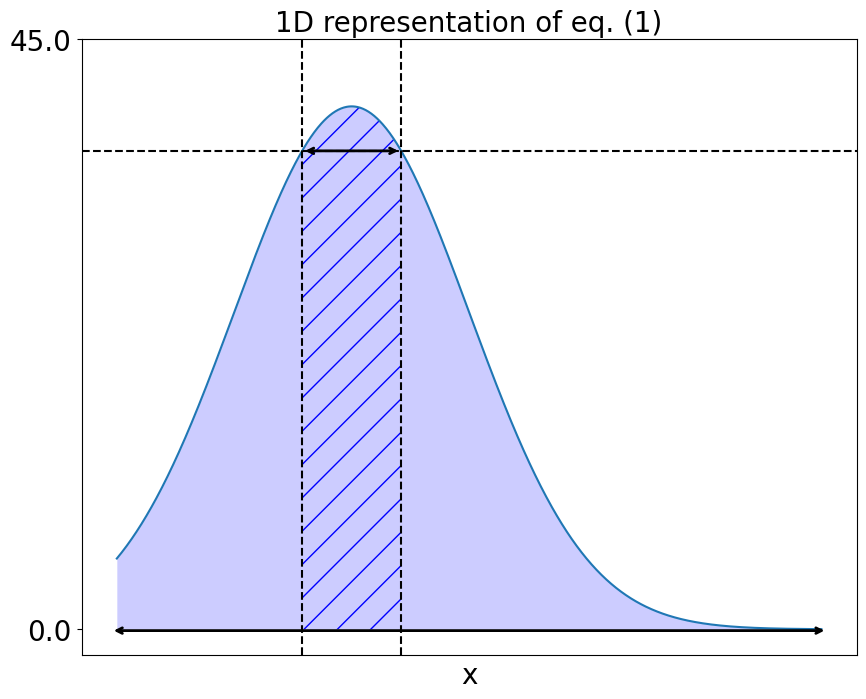

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Use LaTeX for text rendering
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Computer Modern Roman'
# plt.rcParams['font.sans-serif'] = 'Computer Modern Sans serif'
# plt.rcParams['font.monospace'] = 'Computer Modern Typewriter'
# plt.rcParams['axes.unicode_minus'] = False

fig, axs = plt.subplots(1, 1, figsize=(10, 8))

# Define the Gaussian distribution parameters
mean = -2
std_dev = 1
threshold = 36.5

# Generate x values
x = np.linspace(-4, 2, 1000)

# Generate y values using the Gaussian (normal) distribution formula
y = 100*norm.pdf(x, mean, std_dev)

# Plot the Gaussian distribution
axs.plot(x, y, label='Gaussian Distribution')

# Highlight the portion of the distribution above the threshold
x_fill = x[y > threshold]
y_fill = y[y > threshold]
axs.fill_between(x_fill, y_fill, color='none', hatch='/', edgecolor='blue', linewidth=0)

# Highlight the portion of the distribution above the threshold
axs.fill_between(x, y, color='blue', alpha=0.2, edgecolor='k', linewidth=0)

# Add vertical lines for over threshold area
axs.axvline(x=x_fill[0], color='k', linestyle='--')
axs.axvline(x=x_fill[-1], color='k', linestyle='--')
axs.axhline(y=threshold, color='k', linestyle='--')

# Add double arrow representing S_alpha
axs.annotate('', xy=(x_fill[0], threshold), xytext=(x_fill[-1], threshold),
             arrowprops=dict(arrowstyle='<->', color='k', lw=2))

# Add double arrow representing S
axs.annotate('', xy=(x[0]-0.05, -0.1), xytext=(x[-1]+0.05, -0.1),
             arrowprops=dict(arrowstyle='<->', color='k', lw=2))

# Add labels and annotations
axs.set_title(r'1D representation of eq. (1)', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
# axs.ylabel('km-scale precipitation p (mm/h)', fontsize = 12)

# Customize tick labels
axs.set_xticks([])  # Remove all x-tick labels
y_ticks = axs.get_yticks()
axs.set_yticks([y_ticks[1], y_ticks[-1]], [f'{y_ticks[1]:.1f}', f'{y_ticks[-1]:.1f}'], fontsize = 20)

# Save the plot as a vector graphic
plt.savefig('final_fig/scheme.pdf', format='pdf', dpi =300)
plt.show()


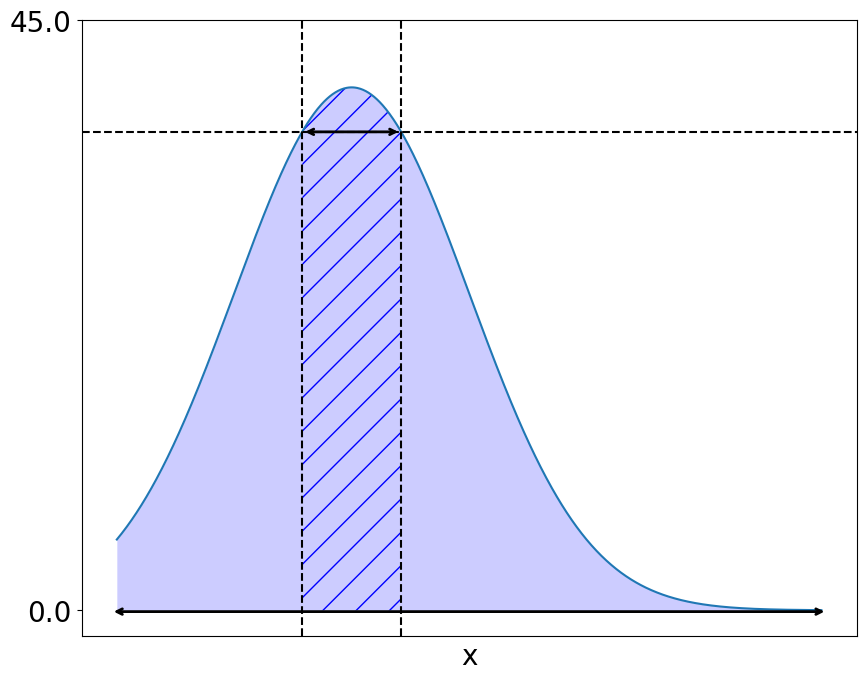

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Optionally, enable LaTeX text rendering if needed
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Computer Modern Roman'
# plt.rcParams['font.sans-serif'] = 'Computer Modern Sans serif'
# plt.rcParams['font.monospace'] = 'Computer Modern Typewriter'
# plt.rcParams['axes.unicode_minus'] = False

# Create a figure and a single set of axes
fig, axs = plt.subplots(1, 1, figsize=(10, 8))

# Define the Gaussian distribution parameters
mean = -2
std_dev = 1
threshold = 36.5

# Generate x values and compute corresponding y values
x = np.linspace(-4, 2, 1000)
y = 100 * norm.pdf(x, mean, std_dev)

# Plot the Gaussian distribution
axs.plot(x, y)

# Highlight the portion of the distribution above the threshold using hatch pattern
x_fill = x[y > threshold]
y_fill = y[y > threshold]
axs.fill_between(x_fill, y_fill, color='none', hatch='/', edgecolor='blue', linewidth=0)

# Also highlight the area under the curve with a transparent blue fill
axs.fill_between(x, y, color='blue', alpha=0.2, edgecolor='k', linewidth=0)

# Draw vertical and horizontal dashed lines to denote threshold boundaries
axs.axvline(x=x_fill[0], color='k', linestyle='--')
axs.axvline(x=x_fill[-1], color='k', linestyle='--')
axs.axhline(y=threshold, color='k', linestyle='--')

# Add double arrows (annotations) to indicate key distances (S_alpha and S)
axs.annotate('', xy=(x_fill[0], threshold), xytext=(x_fill[-1], threshold),
             arrowprops=dict(arrowstyle='<->', color='k', lw=2))
axs.annotate('', xy=(x[0]-0.05, -0.1), xytext=(x[-1]+0.05, -0.1),
             arrowprops=dict(arrowstyle='<->', color='k', lw=2))

# Set the x-axis label only; no titles or extra captions are added to comply with the guidelines
axs.set_xlabel('x', fontsize=20)

# Optionally adjust y-axis tick labels (remove extra labels if needed)
axs.set_xticks([])  # Remove all x-tick labels for a cleaner look
y_ticks = axs.get_yticks()
if len(y_ticks) >= 2:
    axs.set_yticks([y_ticks[1], y_ticks[-1]])
    axs.set_yticklabels([f'{y_ticks[1]:.1f}', f'{y_ticks[-1]:.1f}'], fontsize=20)

# Save the plot using an approved file format (PDF, in this case)
plt.savefig('scheme.pdf', format='pdf', dpi=300)
plt.show()
